In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/611.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/364.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/367.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/116.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/1490.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/374.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/1359.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/485.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/456.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/626.wav
/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/590.wav
/kaggle/input/audio

# **1. Import and Install Dependencies**

# **1.1 Install Dependencies**

In [2]:
!pip install wurlitzer
!pip install tensorflow
!pip install tensorflow-gpu
!pip install tensorflow-io
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker =

# **1.2 Load Dependencies**

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

2025-04-09 17:39:34.277738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 17:39:34.277922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 17:39:34.462465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **2. Build Data Loading Function**

# **2.1 Define Paths to Files**

In [4]:
scream = "/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/1.wav"
non_scream = "/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/non_scream/1.wav"

# **2.2 Build Dataloading Function**

In [5]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

# **2.3 Plot Wave**

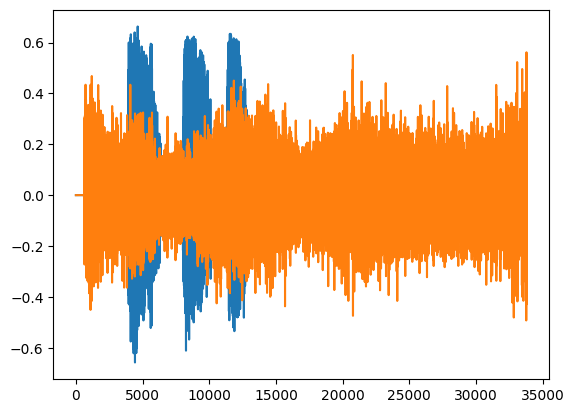

In [6]:
num = 1011
scream = f"/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/{num}.wav"
non_scream = f"/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/non_scream/{num}.wav"

wave = load_wav_16k_mono(scream)
nwave = load_wav_16k_mono(non_scream)

plt.plot(wave)
plt.plot(nwave)
plt.show()

# **3. Create Tensorflow Dataset**

# **3.1 Define Paths to Positive and Negative Data**

In [7]:
POS = "/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream"
NEG = "/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/non_scream"

# **3.2 Create Tensorflow Datasets**

In [8]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

# **3.3 Add labels and Combine Positive and Negative Samples**

In [9]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [10]:
negatives.as_numpy_iterator().next()

(b'/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/non_scream/121.wav',
 0.0)

# **4. Determine Average Length of a Scream**

# **4.1 Calculate Wave Cycle Length**

In [11]:
lengths = []
for file in os.listdir("/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream"):
    tensor_wave = load_wav_16k_mono(f"/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/{file}")
    lengths.append(len(tensor_wave))

# **4.2 Calculate Mean, Min and Max**

In [12]:
np.mean(lengths)


47319.41882501579

In [13]:
lengths[np.argmin(lengths)]

6592

In [14]:
lengths[np.argmax(lengths)]

189312

In [15]:
np.std(lengths)

23718.53433158304

# **5. Build Preprocessing Function to Convert to Spectrogram**

# **5.1 Build Preprocessing Function**

In [16]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

# **5.2 Test Out the Function and Viz the Spectrogram**

In [17]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [18]:
filepath, label

(b'/kaggle/input/audio-dataset-of-scream-and-non-scream/Converted_Separately/scream/768.wav',
 1.0)

In [19]:
spectrogram, label = preprocess(filepath, label)

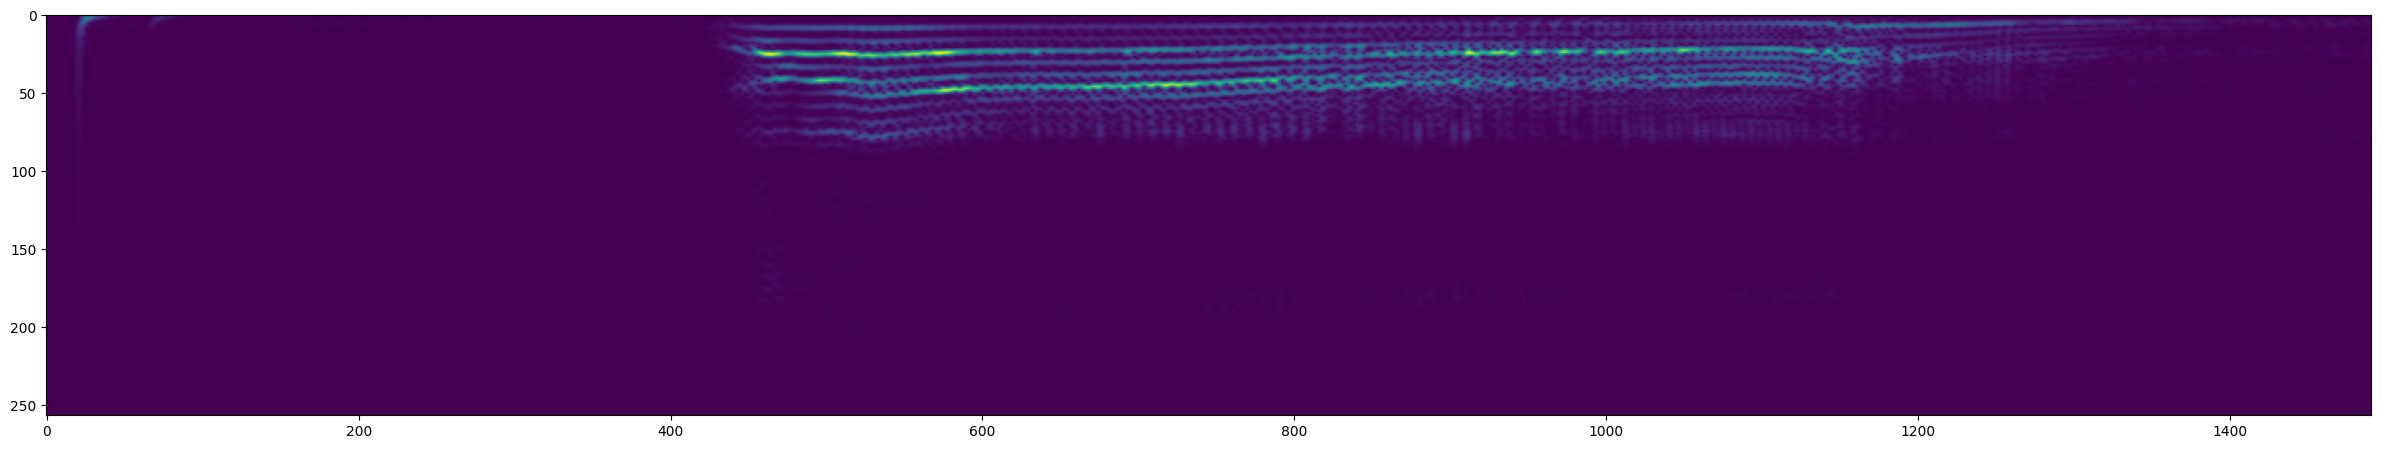

In [20]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

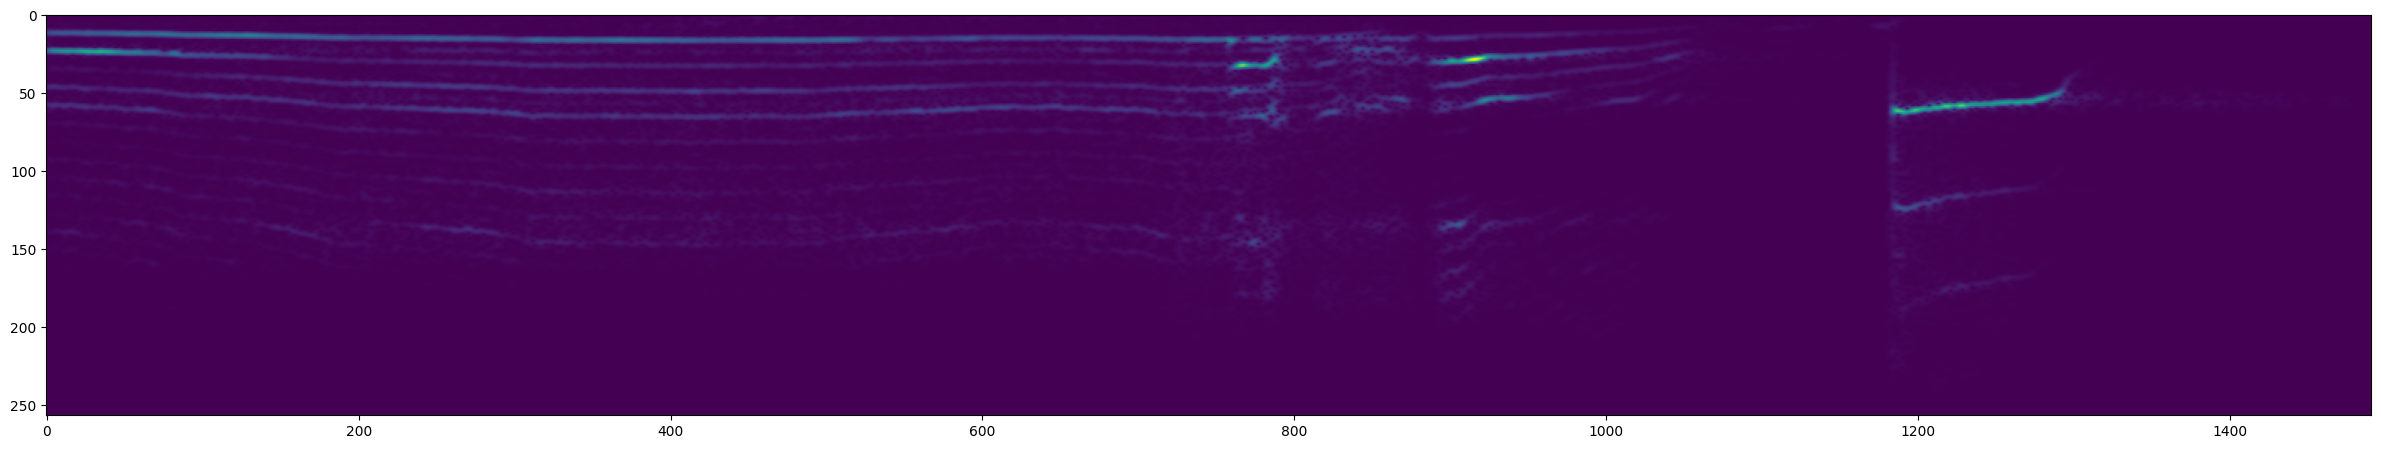

In [21]:
#Her seferinde codu çalıştırarak farklı bir sesin spectrogramını görebilirsiniz

filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next() #scream sounds
#filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next() #non scream sounds
spectrogram, label = preprocess(filepath, label)

plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# **6. Create Training and Testing Partitions**

# **6.1 Create a Tensorflow Data Pipeline**

In [22]:
x = data

In [23]:
data = x

In [24]:
len(data)

3128

In [25]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=3128)  # Shuffle the entire dataset
data = data.batch(16)  # Adjust batch size depending on memory
data = data.prefetch(tf.data.AUTOTUNE)  # Use AUTOTUNE for dynamic prefetching

# **6.2 Split into Training and Testing Partitions**

In [26]:
train = data.take(137)  # Take 137 samples for training (70%)
val = data.skip(137).take(19)  # Skip training samples and take 19 for validation (10%)
test = data.skip(137 + 19).take(39)  # Take remaining 39 samples for testing (20%)

# **6.3 Test One Batch**

In [27]:
samples, labels = train.as_numpy_iterator().next()
samples.shape

(16, 1491, 257, 1)

# **7. Build Deep Learning Model**

# **7.1 Load Tensorflow Dependencies**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# **7.2 Build Sequential Model, Compile and View Summary**

In [29]:
model = Sequential()

# First Conv Layer with Pooling
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduce dimensions by half

# Second Conv Layer with Pooling
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Further reduce dimensions by half

# Flatten the reduced output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


In [30]:
# Compile the model
model.compile(optimizer='Adam', 
              loss='BinaryCrossentropy', 
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 744, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 742, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 371, 62, 16)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 368032)            0         
                                                                 
 dense (Dense)               (None, 128)               4

# **7.3 Fit Model, View Loss and KPI Plots**

In [32]:
hist = model.fit(train, epochs=4, validation_data=val)

Epoch 1/4


I0000 00:00:1744220756.348384     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


137/137 [==============================] - 17s 78ms/step - loss: 0.6035 - recall: 0.8990 - precision: 0.8672 - val_loss: 0.1534 - val_recall: 0.9542 - val_precision: 0.9359
Epoch 2/4
137/137 [==============================] - 11s 79ms/step - loss: 0.1670 - recall: 0.9549 - precision: 0.9507 - val_loss: 0.1011 - val_recall: 0.9600 - val_precision: 0.9796
Epoch 3/4
137/137 [==============================] - 11s 78ms/step - loss: 0.1073 - recall: 0.9620 - precision: 0.9692 - val_loss: 0.0608 - val_recall: 0.9695 - val_precision: 0.9937
Epoch 4/4
137/137 [==============================] - 11s 79ms/step - loss: 0.0781 - recall: 0.9729 - precision: 0.9871 - val_loss: 0.0515 - val_recall: 0.9864 - val_precision: 0.9864


In [33]:
hist.history

{'loss': [0.6035071611404419,
  0.1669532060623169,
  0.10726971924304962,
  0.0781465619802475],
 'recall': [0.8990169763565063,
  0.9549071788787842,
  0.9620018601417542,
  0.9728506803512573],
 'precision': [0.867241382598877,
  0.9507042169570923,
  0.9691876769065857,
  0.9871441721916199],
 'val_loss': [0.1534150242805481,
  0.10112689435482025,
  0.06075696647167206,
  0.05148621276021004],
 'val_recall': [0.9542483687400818,
  0.9599999785423279,
  0.9695122241973877,
  0.9863945841789246],
 'val_precision': [0.9358974099159241,
  0.9795918464660645,
  0.9937499761581421,
  0.9863945841789246]}

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

KeyError: 'precision_1'

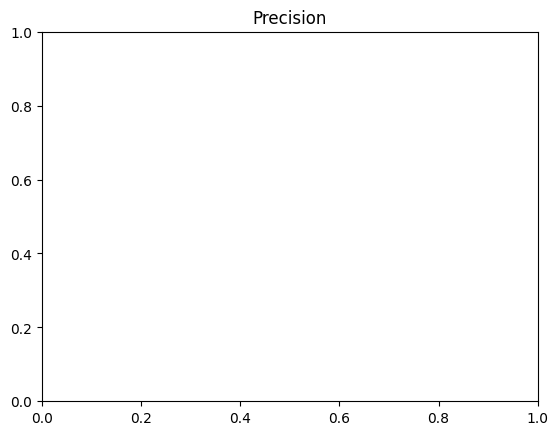

In [34]:
plt.title('Precision')
plt.plot(hist.history['precision_1'], 'r')
plt.plot(hist.history['val_precision_1'], 'b')
plt.show()

KeyError: 'recall_1'

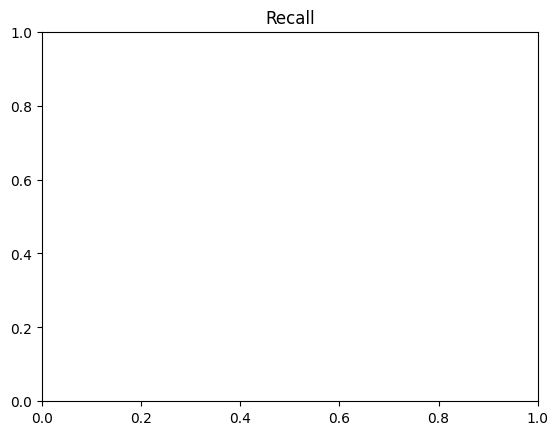

In [35]:
plt.title('Recall')
plt.plot(hist.history['recall_1'], 'r')
plt.plot(hist.history['val_recall_1'], 'b')
plt.show()

# **8. Make a Prediction**

# **8.1 Get One Batch and Make a Prediction**

In [36]:
X_test, y_test = test.as_numpy_iterator().next()

In [37]:
X_test.shape

(16, 1491, 257, 1)

In [38]:
y_test.shape

(16,)

In [39]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 113ms/step


# **8.2 Convert Logits to Classes**

In [40]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [41]:
from sklearn.metrics import accuracy_score, classification_report

In [42]:
accuracy_score(y_test, yhat)

0.9375

In [43]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.92      1.00      0.96        12

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



# **9. Saving the Model**

In [44]:
model.save('my_model.h5')  # Saves the model as an HDF5 file


# **Loading the Model**

In [45]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')
